<a href="https://colab.research.google.com/github/lydiandiba/Hass-Consulting-Company-Regression-Analysis/blob/master/Hass_Consulting_Company_IP_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

a) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices then create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


b) Defining the Metric for Success

Creating a model that will give me the most accurate prediction for the sale of the houses.



c) Understanding the context

Real estate is "property consisting of land and the buildings on it, along with its natural resources such as crops, minerals or water; immovable property of this nature. Real Estate business is booming as most people tend to buy their houses through these companies as it is time saving as well as hustle free for the buyer. There are alot of factors that are considered before a prospecive buyer buys a house, such as location, size of the house, number of bedrooms, the features the house has...


d) Recording the Experimental Design

I will load and read the data, get information on the variables, clean the data by checking for and removing outliers, missing values and duplicates. I will then perform feature engineering and create my models to find the one with the highest accuracy. Finally, evaluate my models by challenging the solution and give my conclusion.


# Reading the data

In [0]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(10, 8)})

# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

In [3]:
# loading and reading our dataest
# We use 'parse_dates' to convert the 'dteday' column into a 'datetime64[ns]' data type

housing = pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# data info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [5]:
# check for null values
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# check for duplicates
housing.duplicated().sum()

3

In [0]:
#dropping the duplicates
housing = housing.drop_duplicates(keep = 'first')

In [8]:
# confirming if the duplicates have been dropped
housing.duplicated().any()

False

In [9]:
# size of our dataset
housing.shape

(21610, 20)

# Data Analysis and Preparation

In [10]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Attribute Information:**

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode of the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

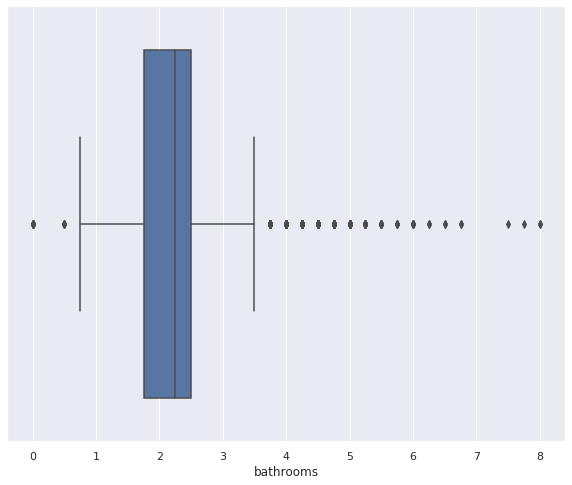

In [11]:
# looking for outliers

sns.boxplot(x = housing['bathrooms'])


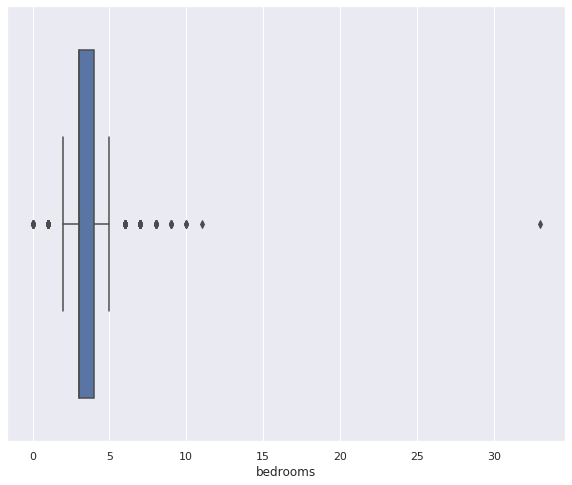

In [12]:
sns.boxplot(x = housing['bedrooms'])

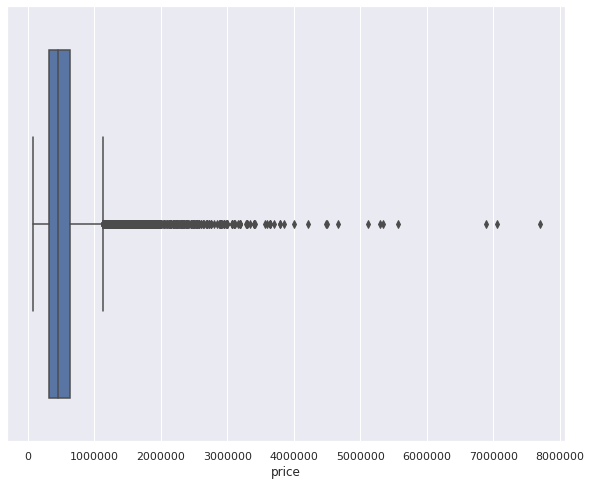

In [13]:
sns.boxplot(x = housing['price'])

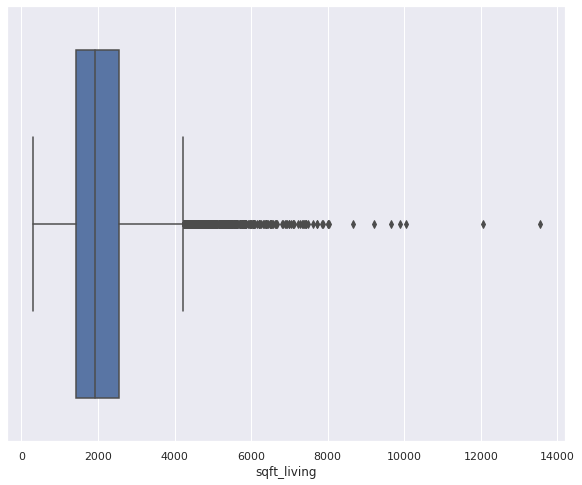

In [14]:
sns.boxplot(x = housing['sqft_living'])

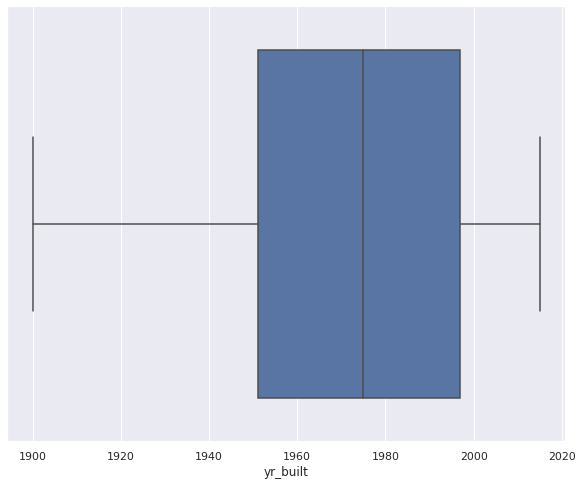

In [15]:
sns.boxplot(x = housing['yr_built'])

We can see from our bot plots that most of the variables have outliers 

# Data Visualization

In [16]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Univariate Analysis

In [17]:
# accesing the dataset information using pandas profiling

import pandas_profiling as pp
pp.ProfileReport(housing)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,21
Number of observations,21610
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,20
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


We can see from the pandas profilling that most houses do not have a view.

Most houses do not have a waterfront.

Most houses have 1 and 2 floors.

most houses have 3 bedrooms then 4 bedrooms follows closely in frequency. 

In [0]:
# #Graphical Non observation of imbalanced price column
# from scipy.stats import norm

# sns.distplot(housing['price'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(housing['price'], plot=plt)

Bivariate Analysis

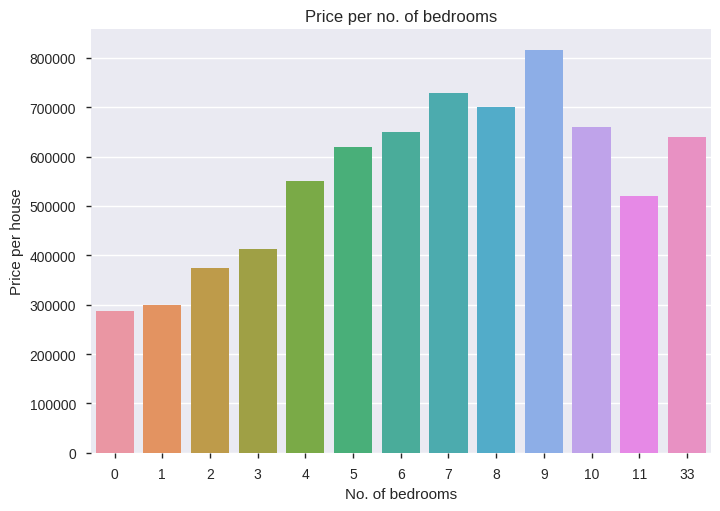

In [19]:
# Seaborn

# bedrooms vs price
ax = sns.barplot(x = 'bedrooms', y = 'price', data=housing, ci=None, estimator=np.median)
ax.set(xlabel='No. of bedrooms',
       ylabel='Price per house',
       title='Price per no. of bedrooms')
plt.show()

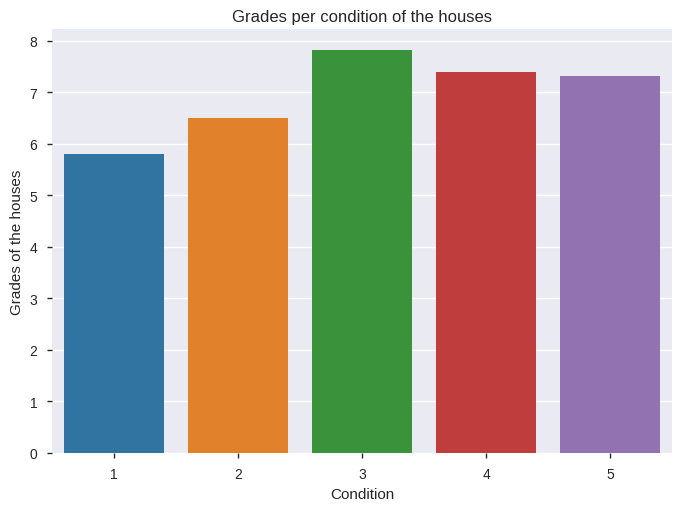

In [20]:
# Condition vs Grade
ax = sns.barplot(x = 'condition', y = 'grade', data=housing, ci=None)
ax.set(xlabel='Condition',
       ylabel='Grades of the houses',
       title='Grades per condition of the houses')
plt.show()

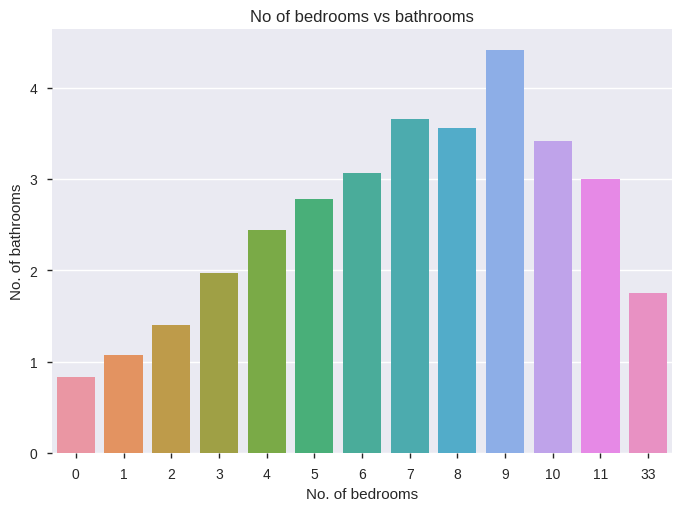

In [21]:
# Bedroom vs Bathroom
ax = sns.barplot(x = 'bedrooms', y = 'bathrooms', data=housing, ci=None)
ax.set(xlabel='No. of bedrooms',
       ylabel='No. of bathrooms',
       title='No of bedrooms vs bathrooms')
plt.show()

Multivariate Analysis

In [0]:
# preprocessing
X = housing.drop('price', 1)
y = housing['price']

# splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [23]:
#Checking for correlations between features
#
corr = housing.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


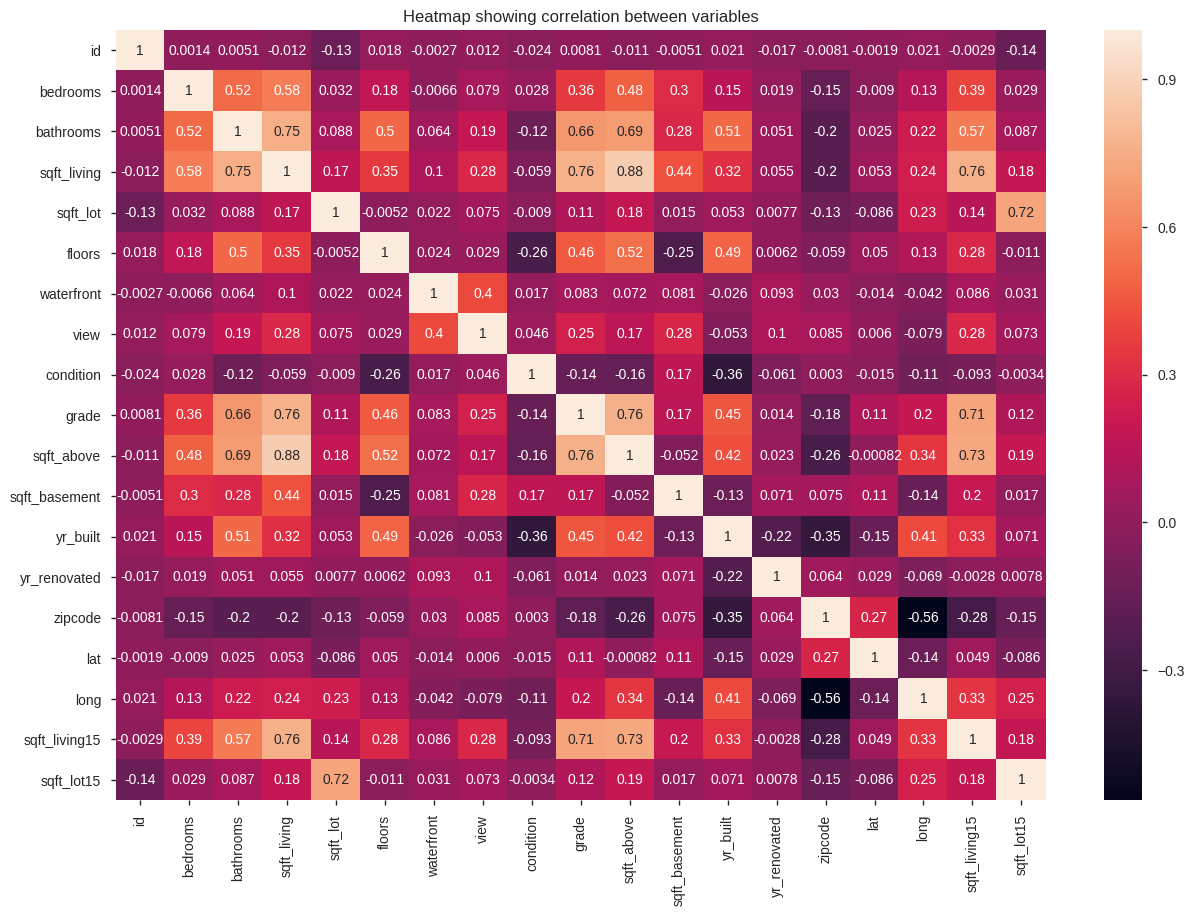

In [24]:
#Checking for correlations between features visually
#
plt.figure(figsize = (15, 10))
sns.heatmap(X.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

There are really highly correlated features in our dataset. These include bathroom and sqft_living, sqft_living and sqft_above, sqft_living and sqft_living15, sqft_abave and grade. We will perform Vif to determine which features to keep and which ones to drop

In [0]:
# calculating Vif and dropping highly correlated features
#
from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh):
  cols = X.columns
  variables = np.arange(X.shape[1])
  dropped=True
  while dropped:
      dropped=False
      c = X[cols[variables]].values
      vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
      maxloc = vif.index(max(vif))
      if max(vif) > thresh:
          print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
          variables = np.delete(variables, maxloc)
          dropped=True
  print('Remaining variables:')
  print(X.columns[variables])
  return X[cols[variables]]


In [26]:
calculate_vif_(X, 4)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'sqft_living' at index: 3
dropping 'sqft_above' at index: 9
Remaining variables:
Index(['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2.50,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,4,2.50,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2,0.75,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,3,2.50,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


# Model Development

In [0]:
#apply log transformation to price
housing['price'] = np.log(housing['price'])

## Multiple linear Regression

In [0]:
# preparing the data

X = housing[['bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'yr_built','grade','sqft_basement']]
y = housing['price']


In [0]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [30]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# finding the most optimal coefficients for all the attributes. 
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-2.210884e-02
sqft_living,2.098488e-04
sqft_lot,-2.016920e-07
condition,3.469357e-02
yr_built,-4.562645e-03
grade,2.475523e-01
sqft_basement,4.059078e-05


From the output, this means that for a unit increase in bedrooms, sqft_lot and yr_built there is an nsignificant decrease in price. 
A unit increase in condition and grade cause an insignificant increase in price of a house

In [32]:
# Making Predictions
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
price_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
price_df

,Actual,Predicted
20188,13.308013,12.818639
7573,12.676076,12.804989
12873,12.409013,12.841526
209,13.047640,13.110548
19155,12.154779,12.422087
...,...,...
11080,12.818248,12.874527
18910,13.506537,13.299285
15838,12.926348,13.165624
8695,12.923912,13.283506


In [33]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.25947694310608554
Mean Squared Error: 0.10595723502494508
Root Mean Squared Error: 0.3255107295081763


In [34]:
from sklearn.metrics import r2_score
m = r2_score(y_test, y_pred)
m

0.6290839302641773

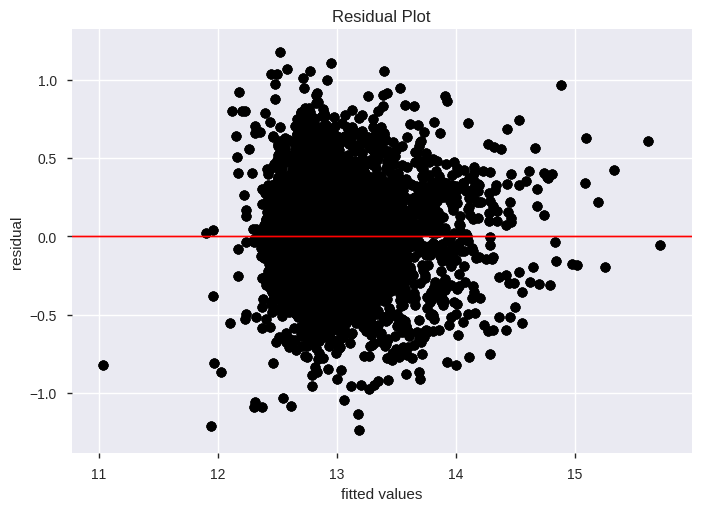

In [36]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)
# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)
# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

In [121]:
# assess the heteroskedasticity using Barlett's test.


import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data
# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## Quantile Regression

In [116]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', housing)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3276
Model:                       QuantReg   Bandwidth:                     0.06116
Method:                 Least Squares   Sparsity:                       0.8543
Date:                Mon, 27 Jan 2020   No. Observations:                21610
Time:                        07:42:31   Df Residuals:                    21602
                                        Df Model:                            7
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3873      0.235     40.021      0.000       8.928       9.847
X[0]          -0.0201      0.004     -5.152      0.000      -0.028      -0.012
X[1]           0.0002   6.35e-06     25.733      0.000       0.000       0.000
X[2]        1.305e-07   7.18e-08      1.818      0.0

In [117]:
# Making Predictions
# 
y_pred = regressor.predict(x_test)

# To compare the actual output values for X_test with the predicted values
# 
quan = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
quan

,Actual,Predicted
20188,13.308013,12.818639
7573,12.676076,12.804989
12873,12.409013,12.841526
209,13.047640,13.110548
19155,12.154779,12.422087
...,...,...
11080,12.818248,12.874527
18910,13.506537,13.299285
15838,12.926348,13.165624
8695,12.923912,13.283506


In [122]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.25947694310608554
Mean Squared Error: 0.10595723502494508
Root Mean Squared Error: 0.3255107295081763


In [123]:
from sklearn.metrics import r2_score
q = r2_score(y_test, y_pred)
q

0.6290839302641773

Quantile accuracy is 62%

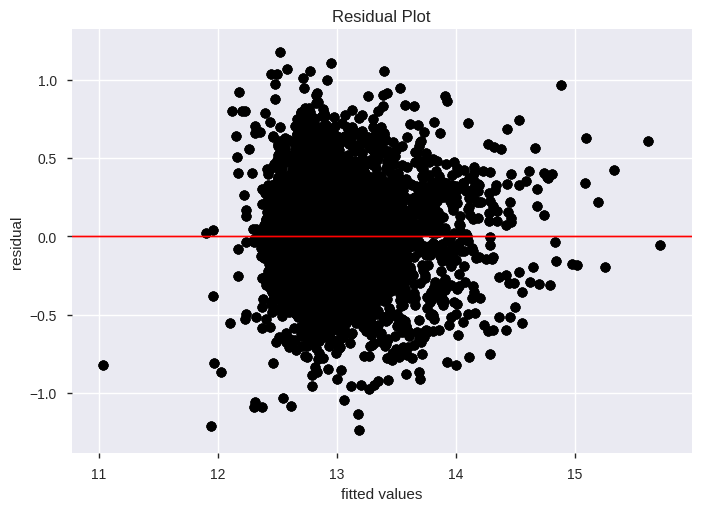

In [124]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)
# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)
# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

## Ridge Regression

In [0]:
# Importing our libraries
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
# Setting up our X and y datasets
#
x = housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
'sqft_lot15']]
y = housing['price']


In [0]:
# Splitting the dataset into training and testing sets
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [81]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)
first_model = (mean_squared_error(y_test, y_pred))
# first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x_test)))
print(first_model)

0.11640780650693179


The output  value of 0.1145 will be our indicator to determine if the regularized ridge regression model is superior or not.

In [0]:
# determining the most appropriate value for the l2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [83]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x_train,y_train)
search.best_params_


{'alpha': 0.001}

the value of 0.115 is slightly worse than the baseline model

In [84]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(x_train,y_train)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(x_test)))
print(second_model)

0.11641234564360903


In [85]:
# getting he coefficients of the model
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,(housing).columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 2.319634807550902e-07,
 'bedrooms': 0.00014729821705959916,
 'condition': 0.00010540442608780645,
 'floors': 0.18177267424011184,
 'grade': -8.322165485855765e-07,
 'id': -0.028283286865460455,
 'price': -0.012669726886978072,
 'sqft_living': 0.07883034342219492,
 'sqft_lot': 0.09767288119011405,
 'view': 0.00015161409964206695,
 'waterfront': -4.315882602062143e-06}

The 0.1145 is lower than the 0.1149. This is because the last results are not cross-validated. 
In addition, these results indicate that there is little difference between the ridge and baseline models.

In [86]:
# Making predictions
#
y_pred = ridge.predict(x_test)
y_pred
# To compare the actual output values for P_test with the predicted values
# 
r = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
r

,Actual,Predicted
20188,13.308013,12.986581
7573,12.676076,12.775751
12873,12.409013,12.736475
209,13.047640,12.900733
19155,12.154779,12.405025
...,...,...
19909,13.302933,13.021824
19659,13.190022,12.994888
19153,13.248115,13.359855
8721,12.688499,12.715981


In [87]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
r

0.585847541250206

Ridge Accuracy is 58%

## Lasso regression

In [0]:
# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [0]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [55]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(x, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(x, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(x))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.0
lasso MSE: 0.277561826009499
lasso coef: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [88]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 

print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.5104045616729154
linear score: 0.5858636898348489
lasso MSE: 0.137618290530299
linear MSE: 0.11640780650692784
lasso best estimator coef: [ 0.          0.          0.13973046  0.          0.          0.
  0.15820995  0.          0.          0.00709818 -0.        ]
linear coef: [-0.02630595 -0.00975804  0.0833724   0.00960845  0.04256689  0.06356051
  0.21366887  0.0432362   0.09211998  0.07224524 -0.02272396]


In [89]:
# Making predictions
#
y_pred = gridlasso.predict(X_test)
y_pred
# To compare the actual output values for P_test with the predicted values
# 
l = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
l

,Actual,Predicted
20188,13.308013,12.993784
7573,12.676076,12.863477
12873,12.409013,12.872119
209,13.047640,12.989572
19155,12.154779,12.636714
...,...,...
19909,13.302933,12.999105
19659,13.190022,12.990463
19153,13.248115,13.181410
8721,12.688499,12.762863


In [90]:
from sklearn.metrics import r2_score
l = r2_score(y_test, y_pred)
l

0.5104045616729154

Lasso accuracy is 51%

## Elastic Net Regression

In [0]:
# Importing our libraries
# 
import numpy as np
import pandas as pdv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [92]:
# Creating our linear regression model for the purpose of comparison
# 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
first_model = (mean_squared_error(y_test, y_pred))
# first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x_test)))
print(first_model)

0.11640780650692784


In [93]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 2.319634807550902e-07,
 'bedrooms': 0.00014729821705959916,
 'condition': 0.00010540442608780645,
 'floors': 0.18177267424011184,
 'grade': -8.322165485855765e-07,
 'id': -0.028283286865460455,
 'price': -0.012669726886978072,
 'sqft_living': 0.07883034342219492,
 'sqft_lot': 0.09767288119011405,
 'view': 0.00015161409964206695,
 'waterfront': -4.315882602062143e-06}

In [0]:
# elastic net model

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [102]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X_train,y_train)
search.best_params_
# abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [104]:
# we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X_train,y_train)
model_=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(x_test)))
print(model_)



229201.745852584


In [105]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.004706085391940029,
 'bedrooms': 0.08762118006556437,
 'condition': 0.07351046572402167,
 'floors': 0.19983557942261668,
 'grade': -0.017226642798026447,
 'id': -0.022104104515674787,
 'price': 0.0,
 'sqft_living': 0.03837147978726051,
 'sqft_lot': 0.059657766150471955,
 'view': 0.08391944507934583,
 'waterfront': 0.03897962436726829}

In [112]:
# Making Predictions
# 
y_pred = elastic.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
elastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
elastic

,Actual,Predicted
20188,13.308013,12.988308
7573,12.676076,12.780451
12873,12.409013,12.736917
209,13.047640,12.922366
19155,12.154779,12.444526
...,...,...
19909,13.302933,13.014689
19659,13.190022,12.996861
19153,13.248115,13.343866
8721,12.688499,12.707435


In [113]:
from sklearn.metrics import r2_score
e = r2_score(y_test, y_pred)
e

0.5847024098417797

# Conclusion

In [120]:
#Models vs r2 score.
models = ['multiple_linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [m,q,r,l,e]
conc = pd.DataFrame({'models': models, 'r2_scores': r2_scores})
conc


,models,r2_scores
0,multiple_linear,0.629084
1,quantile,0.629084
2,ridge,0.585848
3,lasso,0.510405
4,elastic,0.584702


Multiple linear and quantile gave us the highest accuracy of all the other models.


# Challenging the solution

We could have gotten higher accuracy scores if we had more informative variables. 